Alexander Sandoval


# HW3: Problem 3 Classification Comparison with Synthetic Data


* Write a jupyter notebook.
* It is essential that you include markdown cells explaining what you are doing at each step.

* You are going to compare the classification algorithms you have learned:

1.  Naive Bayes Classification
2.  Logistic Regression
3.  Quadradic Discriminant Analysis
4.  SVM using radial basis functions (RBF)
5.  Decision Tree
6.  KNN with K = 1

So make sure you run each of these algorithms on the data sets you will create to test.

* The goal is to create 4 synthetic data examples with 2D input data, 2 classes, to use to compare the algorithms.
* You should use a combination of the following 3 synthetic functions to make your examples:
-   [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
-   [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)
-   [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

* You may use a combination of the above in the same example. For example, one class could come from a moon and the other class from a circle in the same example. You could also make one class is a combination of a moon bending oneway and a moon bending the other if that worked better for your example.
* Your examples should be such that:

1.  One of the four examples will be two well-separated blob classes. This example show that all the classifiers work pretty well (near-perfect or perfect classification)
2.  In the two of the data examples, the linear classifier (logistic regression) should do more poorly (both in training and test evaluation) than the others
3.  In the second example the quadratic should do very well (both in training and testing) but the linear classifier should do poorly. The SVM, Decision Tree, and KNN should also do better than the Logistic Regressioon
4.  In the third example you should be able to construct an example where the decision tree and KNN both overfit so the training error is small but the testing error is large, and linear regression does better
5.  The fourth example should be such that SVM and KNN do better than the others (in testing error)

In your evaluations, you should always split the data set into a training and test set using [sklearn.model_selection.train_test_split ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) and also create a report using [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

There should be both an evaluation for training which means fit on training test on training (evaluation of fit) and testing which means fit on training but test on the testing data with the training fit!
Never, ever, fit on training data!!!

Since you are working with 2D data you should also create a set of visualized comparisons like those here:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">Classifier comparison</span>
<span style="margin-top: 0.5em; display: block;">A comparison of a
several classifiers in scikit-learn on synthetic datasets. The point of
this example is to illustrate the nature of decision boundaries of
different classifiers. This should be ta...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>

You can use these visualizations and comparisons as inspiration but you should develop your own. Don\'t forget to see your random numbers! For some more idea on how to generate the synthetic data please read these examples too:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">2.3. Clustering</span> <span
style="margin-top: 0.5em; display: block;">Clustering of unlabeled data
can be performed with the module sklearn.cluster. Each clustering
algorithm comes in two variants: a class, that implements the fit method
to learn the clusters on trai...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>


In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons

from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report


In [148]:
# Set random seed for reproducibility
np.random.seed(42)


**BLOBS**

Creating a Synthetic dataset of 1000 samples, 2 clusters and 2 clases

In [149]:
# blobs
X_blob, y_blob = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=42)
unique_classes_blob = np.unique(y_blob)
print(unique_classes_blob, X_blob.shape, y_blob.shape )

[0 1] (1000, 2) (1000,)


**CIRCLES**

Creating a Synthetic dataset of 1000 samples, dispersion of 0.1(not so large) and distances between inner and outer values of 0.5


In [150]:
# circles
X_circles, y_circles = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
unique_classes_circles = np.unique(y_circles)
print(unique_classes_circles, X_circles.shape, y_circles.shape )

[0 1] (1000, 2) (1000,)


**MOONS**

Creating a Synthetic dataset of 1000 samples, dispersion of 0.1(not so large)

In [151]:
# moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)
unique_classes_moons = np.unique(y_moons)
print(unique_classes_moons, X_moons.shape, y_moons.shape )

[0 1] (1000, 2) (1000,)


Generating names of classifiers and setting according the Skilearn library

In [152]:
# Example 3: Combination of blobs and circles
names = [
    "Nearest Neighbors",
    "Logistic Regression",
    "RBF SVM",
    "Decision Tree",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(1),
    LogisticRegression(random_state=42),
    SVC(kernel='rbf', C=0.025, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

1) Splitting the dataset training 80% and testing 20%

2) Loop over the classifier and its names with clf, reibing the classifiers, being the model.

3) Fitting the model over the training sample, get the y predicted and the accuracy score in testing and training data.

4) Generate a scatterplot according to max and min values of dataset and plot the boundary decision.

In [214]:
def representation(datasets, names, classifiers):
    for X, y, dataset_name in datasets:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        plt.figure(figsize=(9, 6))

        for i, (name, clf) in enumerate(zip(names, classifiers), 1):
            plt.subplot(2, 3, i)

            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            y_pred_train = clf.predict(X_train)
            accuracy_train = accuracy_score(y_train, y_pred_train)

            # Plot decision boundary
            h = 0.02  # step size in the mesh
            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, alpha=0.8)
            plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
            plt.title(f"{name}\nTest Accuracy: {accuracy:.2f}\nTrain Accuracy: {accuracy_train:.2f}")


        plt.suptitle(f"Decision Boundaries for {dataset_name}", fontsize=13)
        plt.tight_layout(pad=3.0)
        plt.show

Compute de representation function in dataset according to Blob Synthetic DataSet.

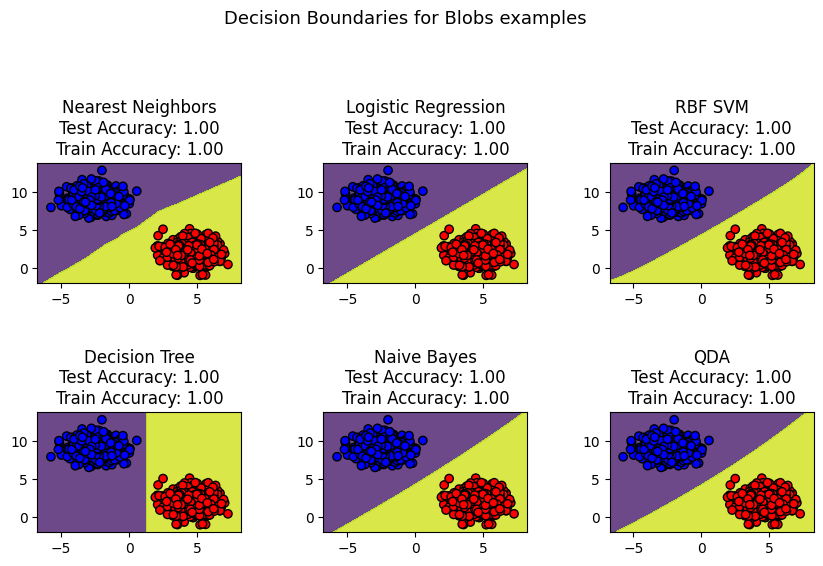

In [215]:
datasets = [(X_blob, y_blob, "Blobs examples")]

representation(datasets, names, classifiers)

Compute de representation function in dataset according to Circles and Moons  Synthetic DataSet.

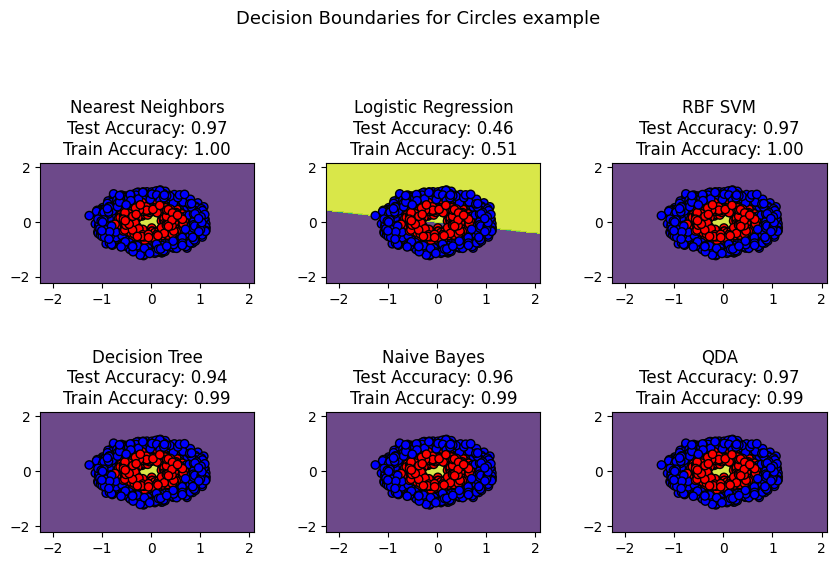

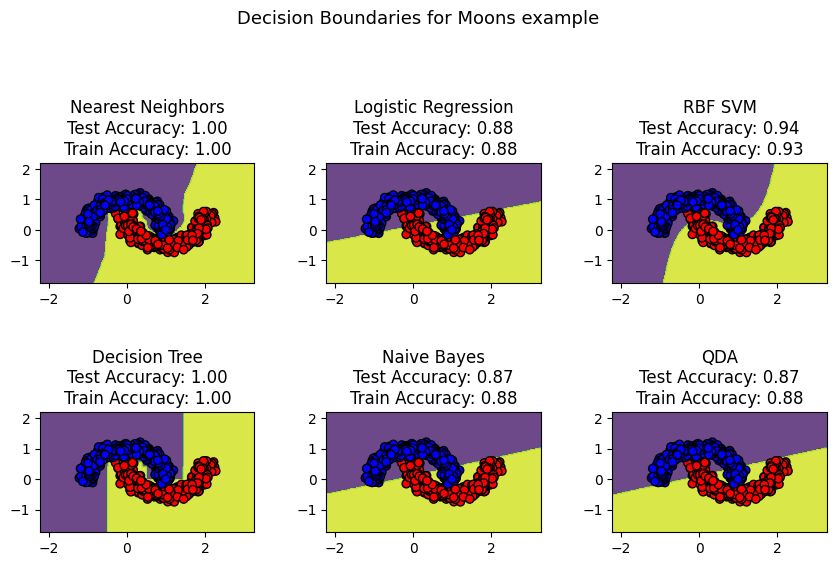

In [155]:
datasets = [(X_circles, y_circles, "Circles example"), (X_moons, y_moons, "Moons example")]

representation(datasets, names, classifiers)

**SECOND**

Compute de *representation* function in dataset according to Combination of [CIRCLES and MOONS](https://) Synthetic DataSet.

In [156]:
# Example 2: Combination of circles and moons
X_combined_2 = np.vstack([X_circles[y_circles == 1], X_moons[y_moons == 0]])
y_combined_2 = np.hstack([y_circles[y_circles == 1], y_moons[y_moons == 0]])
unique_classes_combined_2 = np.unique(y_combined_2)
print(unique_classes_combined_2, X_combined_2.shape, y_combined_2.shape )

[0 1] (1000, 2) (1000,)


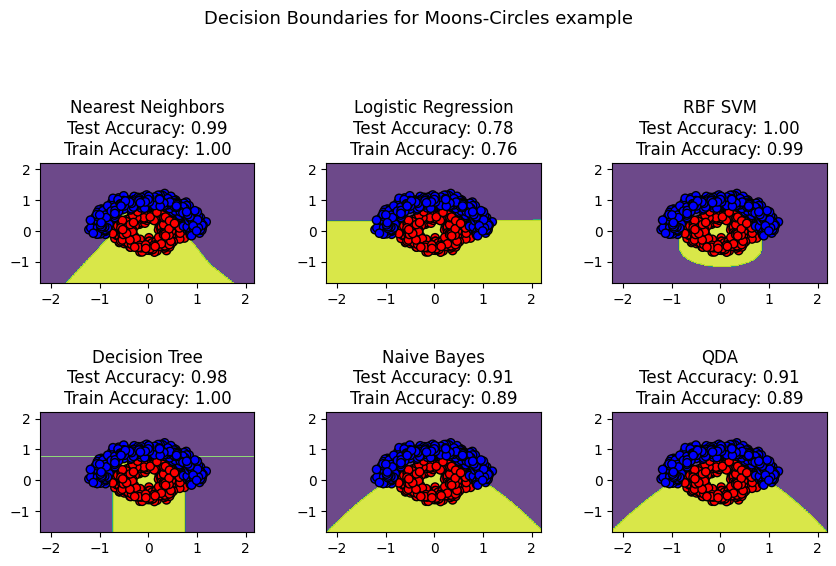

In [157]:
datasets = [(X_combined_2, y_combined_2, "Moons-Circles example")]
representation(datasets, names, classifiers)

**THIRD**

Compute de representation function in dataset according to Combination of [CIRCLES and BLOBS](https://) Synthetic DataSet

In [187]:
# Example 3: Combination of blobs and circles
X_combined_3 = np.vstack([X_circles[y_blob==0], X_circles[y_moons == 1]])
y_combined_3 = np.hstack([y_circles[y_blob == 1], y_circles[y_moons == 0]])
unique_classes_combined_3 = np.unique(y_combined_3)
print(unique_classes_combined_3, X_combined_3.shape, y_combined_3.shape )

[0 1] (1000, 2) (1000,)


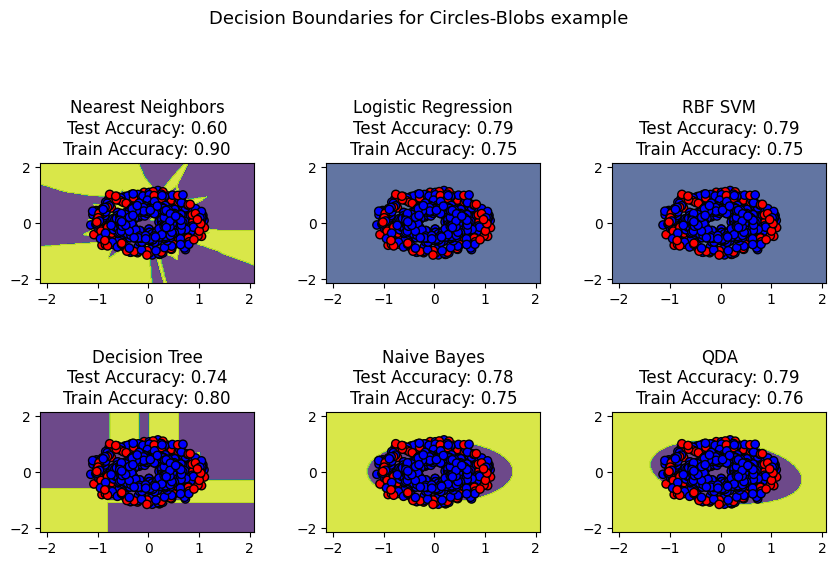

In [188]:
# Generate non-linearly separable datasets
datasets = [(X_combined_3, y_combined_3, "Circles in moons positions example")]

representation(datasets, names, classifiers)

**FORTH**

Compute de representation function in dataset according to Combination of [CIRCLES and MOONS](https://) Synthetic DataSet

In [209]:
# Example 4: Combination of blobs and moons
X_combined_1 = np.vstack([X_moons[y_circles == 1], X_moons[y_moons == 0]])
y_combined_1 = np.hstack([y_moons[y_circles == 0], y_moons[y_moons == 1]])
unique_classes_combined_1 = np.unique(y_combined_1)
print(unique_classes_combined_1, X_combined_1.shape, y_combined_1.shape )

[0 1] (1000, 2) (1000,)


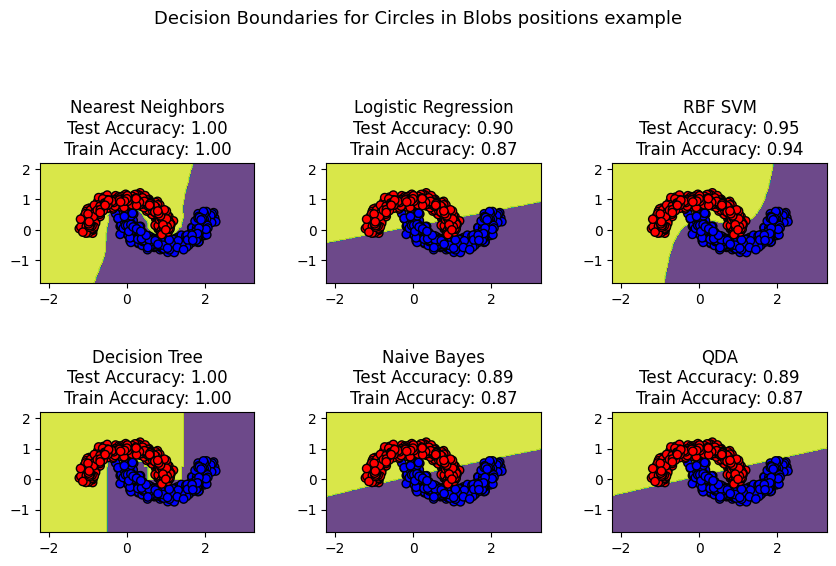

In [210]:
# Generate non-linearly separable datasets
datasets = [(X_combined_1, y_combined_1, "Moons in Circles positions example")]

representation(datasets, names, classifiers)

**Conclusions**

1) Quadratic classifiers are more flexible than linear classifiers because they can model non-linear decision boundaries, assuming that each class has its covariance matrix, allowing for more complex decision boundaries compared to Logistic Regression.

2) For the third example, despite the decision tree showing a better performance in every dataset sample, in this case is possible to get an overfitting with a testing accuracy of 0.74 vs a training accuracy of 0.80, the Dataset is located as a circle formation over blobs location, the different classes of dataset are too close to fit other areas or boundaries of decision tree.

3) kNN and SVM with RBF kernel have good performance for datasets like the one generated using circles; that's why the last example uses a synthetic dataset with circles but takes the positions of the Blobs dataset. These classifiers focus mainly on datasets with complex and non-linear decision boundaries.